In [28]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
import xgboost as xgb
import pandas as pd

In [18]:
X,y = load_boston(return_X_y=True)

In [23]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y)
model = xgb.XGBRegressor(n_estimators=1000,max_depth=100,random_state=1)

In [24]:
model.fit(X_train,y_train)
preds = model.predict(X_valid)

MAE:1.8473982690826174


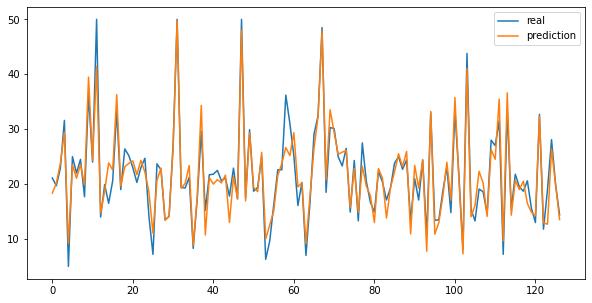

In [40]:
plt.figure(figsize=(10,5))
df = pd.DataFrame({"real":y_valid,"prediction":preds})
plt.plot(df)

plt.legend(df.columns)
print(f"MAE:{mean_absolute_error(y_valid,preds)}")
plt.show()

In [41]:
from sklearn.model_selection import cross_val_score

In [49]:
-1 * cross_val_score(model,X,y,scoring='neg_mean_absolute_error',cv=5)

array([2.37964983, 3.08148321, 3.27632814, 3.53205645, 2.90288173])

In [53]:
import numpy as np
np.quantile(y,q=(.25,.50,.75))

array([17.025, 21.2  , 25.   ])

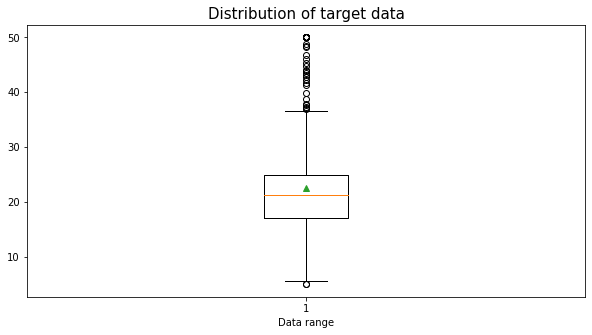

In [71]:
plt.figure(figsize=(10,5))
plt.boxplot(y,showmeans=True,vert=True)
plt.title("Distribution of target data",fontdict={"fontsize":15})
plt.xlabel("Data range")
plt.show()